In [2]:
# low noise simulation data
# without information of the True factors
# limit the size of chosen set , i.e., knum but not nonzero 
# Gamma chosen by all Znorm
from helpers import *
import random
from joblib import Parallel,delayed
warnings.filterwarnings('ignore')

knum = 5
N_simulations =100
N_chosen_set = []
num_chosen_set=[]

Record_ssr=[]
Hand_ssr=[]
Final_knum=[]
unionset=[]
rep =1

def Final(i):
   Unionset = []
#    df = pd.read_csv('/home/guonaixin/trylab/sim2emp/simu_matrix/20Xfull'+str(i+1)+'.csv')
#    df =df.drop('Unnamed: 0',axis=1)
#    Z = np.array(df,dtype = 'float64')
   Z, M, B = create_factors(600, 5, 25+1, sig=0.1)
    # redefine Z to be all the other columns except the last one
   Z = Z[:, :-1]
   # dftest = pd.read_csv('/home/guonaixin/trylab/sim2emp/simu_matrix/20testasset'+str(i+1)+'.csv')
   # dftest = dftest.drop('Unnamed: 0',axis=1)
   # test_asset = np.array(dftest,dtype = 'float64') 
   unionset = choose_factor('SGL', Z, knum, train_size=600, svd_C = 0.4, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset

result= Parallel(n_jobs=5)(delayed(Final)(i) for i in range(N_simulations))
# result=[ Final(i) for i in range(N_simulations)]
N_chosen_set = [i[0]for i in result]
cv_ssr = [i[1]for i in result]
final_svd_C = [i[2]for i in result]
hand_chosen_set =[i[3]for i in result]
Hand_ssr =[i[4]for i in result]
hand_svd_C = [i[5]for i in result]
# N_chosen_set = Parallel(n_jobs=5)(delayed(Final(i,rep)) for i in range(N_simulations))
num_chosen_set=[]
Final_knum=[]
for unionset in N_chosen_set:
   num_chosen_set.append(unionset) 
   Final_knum.append(len(unionset))
    
evaluate(num_chosen_set,N_simulations) #3/5

# num_chosen_set=[]
# Final_knum=[]
# for unionset in hand_chosen_set:
#     num_chosen_set.append(unionset) 
#     Final_knum.append(len(unionset))


[3, 20, 9, 14] check_press1  0.20615951006085229 [10, 9, 22] check_press2 0.3426083345876453
knum 4 [3, 20, 9, 14]
[13, 7, 12, 5] check_press1  0.20050545989112953 [10, 3, 21] check_press2 0.3275034917487825
knum 4 [13, 7, 12, 5]
[20, 13, 16, 23] check_press1  0.18459454462567082 [3, 18, 23] check_press2 0.3043295079958881
knum 4 [20, 13, 16, 23]
[0, 18, 2, 4] check_press1  0.16039965743308773 [23, 9, 12] check_press2 0.32341391835813127
knum 4 [0, 18, 2, 4]
[24, 23, 9, 12] check_press1  0.18153366346225933 [14, 24, 4] check_press2 0.4078616852378503
knum 4 [24, 23, 9, 12]
[1, 4, 0, 3, 2] check_press1  0.013510420400224186 [3, 20, 9, 14] check_press2 0.17278820320966234
knum 5 [1, 4, 0, 3, 2]
[4, 1, 0, 2, 3] check_press1  0.017299932524502036 [13, 7, 12, 5] check_press2 0.17275844192668915
knum 5 [4, 1, 0, 2, 3]
[3, 1, 2, 4, 0] check_press1  0.015507252814401299 [20, 13, 16, 23] check_press2 0.16239881974522652
knum 5 [3, 1, 2, 4, 0]
[0, 4, 2, 1, 3] check_press1  0.014448901094686457 [

(5.02, 1.0, 0.98, 1.0, 0.002, 0.998182)

In [3]:
num_chosen_set

[[3, 1, 2, 4, 0],
 [4, 1, 0, 2, 3],
 [0, 4, 2, 1, 3],
 [1, 4, 0, 3, 2],
 [3, 1, 2, 4, 0],
 [0, 1, 2, 4, 3],
 [1, 2, 4, 0, 3, 19],
 [4, 2, 0, 1, 3],
 [1, 4, 0, 3, 2],
 [2, 0, 1, 3, 4],
 [3, 0, 1, 2, 4],
 [3, 0, 4, 2, 1],
 [0, 1, 3, 4, 2],
 [1, 2, 0, 4, 3],
 [3, 4, 2, 1, 0, 23],
 [1, 3, 0, 4, 2],
 [3, 4, 1, 0, 2],
 [3, 1, 4, 2, 0],
 [2, 0, 1, 4, 3],
 [3, 4, 1, 0, 2],
 [1, 0, 4, 2, 3],
 [3, 2, 4, 1, 0],
 [2, 0, 3, 1, 4],
 [3, 2, 4, 0, 1],
 [1, 4, 0, 2, 3],
 [3, 4, 1, 0, 2],
 [1, 2, 0, 3, 4],
 [1, 0, 2, 4, 3],
 [3, 1, 4, 0, 2],
 [4, 1, 2, 0, 3],
 [4, 2, 1, 3, 0],
 [4, 3, 1, 0, 2],
 [3, 0, 4, 2, 1],
 [4, 1, 0, 2, 3],
 [1, 2, 0, 3, 4],
 [3, 2, 4, 1, 0],
 [0, 2, 3, 1, 4],
 [0, 4, 3, 1, 2],
 [2, 4, 0, 1, 3],
 [4, 3, 0, 1, 2],
 [4, 0, 1, 3, 2],
 [4, 0, 1, 2, 3],
 [4, 2, 1, 0, 3],
 [2, 0, 1, 4, 3],
 [3, 4, 2, 0, 1],
 [2, 0, 3, 4, 1],
 [3, 2, 1, 0, 4],
 [1, 2, 0, 4, 3],
 [0, 2, 1, 4, 3],
 [4, 0, 2, 1, 3],
 [4, 2, 0, 1, 3],
 [3, 2, 0, 1, 4],
 [1, 4, 3, 0, 2],
 [2, 4, 1, 0, 3],
 [3, 4, 2, 1, 0],
 [

In [ ]:
# low noise simulation data
# without information of the True factors
# did NOT limit the size of chosen set , i.e., nonzero but not knum
# Gamma chosen by all Znorm
from helpers import *
import random
from joblib import Parallel,delayed
warnings.filterwarnings('ignore')

knum = 5
N_simulations =100
N_chosen_set = []
num_chosen_set=[]

Record_ssr=[]
Hand_ssr=[]
Final_knum=[]
unionset=[]
rep =1

def Final(i):
   Unionset = []
#    df = pd.read_csv('/home/guonaixin/trylab/sim2emp/simu_matrix/20Xfull'+str(i+1)+'.csv')
#    df =df.drop('Unnamed: 0',axis=1)
#    Z = np.array(df,dtype = 'float64')
   Z, M, B = create_factors(600, 5, 25+1, sig=0.1)
    # redefine Z to be all the other columns except the last one
   Z = Z[:, :-1]
   # dftest = pd.read_csv('/home/guonaixin/trylab/sim2emp/simu_matrix/20testasset'+str(i+1)+'.csv')
   # dftest = dftest.drop('Unnamed: 0',axis=1)
   # test_asset = np.array(dftest,dtype = 'float64') 
   unionset = choose_factor('SGL', Z, knum, train_size=600, svd_C = 0.4, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset

# result= Parallel(n_jobs=5)(delayed(Final)(i) for i in range(N_simulations))
result=[ Final(i) for i in range(N_simulations)]
N_chosen_set = [i[0]for i in result]
cv_ssr = [i[1]for i in result]
final_svd_C = [i[2]for i in result]
hand_chosen_set =[i[3]for i in result]
Hand_ssr =[i[4]for i in result]
hand_svd_C = [i[5]for i in result]
# N_chosen_set = Parallel(n_jobs=5)(delayed(Final(i,rep)) for i in range(N_simulations))
num_chosen_set=[]
Final_knum=[]
for unionset in N_chosen_set:
   num_chosen_set.append(unionset) 
   Final_knum.append(len(unionset))
    
evaluate(num_chosen_set,N_simulations) #3/5

# num_chosen_set=[]
# Final_knum=[]
# for unionset in hand_chosen_set:
#     num_chosen_set.append(unionset) 
#     Final_knum.append(len(unionset))


In [1]:
# zhangjun simulation data
# without information of the True factors
# did NOT limit the size of chosen set , i.e., nonzero but not knum
# Gamma chosen by all Znorm
from helpers import *
import random
from joblib import Parallel,delayed
warnings.filterwarnings('ignore')

knum = 5
N_simulations =10
N_chosen_set = []
num_chosen_set=[]

Record_ssr=[]
Hand_ssr=[]
Final_knum=[]
unionset=[]
rep =1

def Final(i):
   Unionset = []
   df = pd.read_csv('/home/guonaixin/trylab/sim2emp/simu_matrix/20Xfull'+str(i+1)+'.csv')
   df =df.drop('Unnamed: 0',axis=1)
   Z = np.array(df,dtype = 'float64')
#    Z, M, B = create_factors(600, 5, 25+1, sig=0.1)
#     # redefine Z to be all the other columns except the last one
#    Z = Z[:, :-1]
   # dftest = pd.read_csv('/home/guonaixin/trylab/sim2emp/simu_matrix/20testasset'+str(i+1)+'.csv')
   # dftest = dftest.drop('Unnamed: 0',axis=1)
   # test_asset = np.array(dftest,dtype = 'float64') 
   unionset = choose_factor('SGL', Z, knum, train_size=600, svd_C = 0.4, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset

result= Parallel(n_jobs=5)(delayed(Final)(i) for i in range(N_simulations))
# result=[ Final(i) for i in range(N_simulations)]
N_chosen_set = [i[0]for i in result]
cv_ssr = [i[1]for i in result]
final_svd_C = [i[2]for i in result]
hand_chosen_set =[i[3]for i in result]
Hand_ssr =[i[4]for i in result]
hand_svd_C = [i[5]for i in result]
# N_chosen_set = Parallel(n_jobs=5)(delayed(Final(i,rep)) for i in range(N_simulations))
num_chosen_set=[]
Final_knum=[]
for unionset in N_chosen_set:
   num_chosen_set.append(unionset) 
   Final_knum.append(len(unionset))
    
evaluate(num_chosen_set,N_simulations) #3/5

# num_chosen_set=[]
# Final_knum=[]
# for unionset in hand_chosen_set:
#     num_chosen_set.append(unionset) 
#     Final_knum.append(len(unionset))


[1, 2, 4, 3, 14] check_press1  0.9492509451733329 [1, 2, 4, 3, 14] check_press2 0.9492509451733329
knum 4 [1, 2, 4, 3, 14]
[2, 4, 3, 1] check_press1  0.9541587388196046 [2, 4, 3, 1] check_press2 0.9541587388196046
knum 4 [2, 4, 3, 1]
[2, 1] check_press1  0.9327799540548495 [2, 1] check_press2 0.9327799540548495
knum 4 [2, 1]
[2, 4, 3, 1] check_press1  0.9443983544952036 [2, 4, 3, 1] check_press2 0.9443983544952036
knum 4 [2, 4, 3, 1]
[2, 1, 3, 4] check_press1  0.9444505339340882 [2, 1] check_press2 0.9605664987771616
knum 4 [2, 1, 3, 4]
[1, 2, 4, 3, 14] check_press1  0.9492509451733329 [1, 2, 4, 3, 14] check_press2 0.9492509451733329
knum 5 [1, 2, 4, 3, 14]
[2, 1, 4] check_press1  0.9306834562693773 [2, 1] check_press2 0.9395425604702266
knum 5 [2, 1, 4]
[2, 3, 4, 0, 19] check_press1  0.9593205383782548 [2, 4, 3, 1] check_press2 0.9582659877978493
knum 5 [2, 4, 3, 1]
[2, 4, 1, 3, 24, 17, 0, 12, 21, 11] check_press1  0.9431497335164323 [2, 4, 3, 1] check_press2 0.9402957792827532
knum 5

(4.0, 0.0, 0.0, 0.74, 0.03, 0.823333)

In [1]:
# zhangjun simulation data
# without information of the True factors
# limit the size of chosen set , i.e., knum but not nonzero
# Gamma chosen by all Znorm
from helpers import *
import random
from joblib import Parallel,delayed
warnings.filterwarnings('ignore')

knum = 5
N_simulations =3
N_chosen_set = []
num_chosen_set=[]

Record_ssr=[]
Hand_ssr=[]
Final_knum=[]
unionset=[]
rep =1

def Final(i):
   Unionset = []
   df = pd.read_csv('/home/guonaixin/trylab/sim2emp/simu_matrix/20Xfull'+str(i+1)+'.csv')
   df =df.drop('Unnamed: 0',axis=1)
   Z = np.array(df,dtype = 'float64')
#    Z, M, B = create_factors(600, 5, 25+1, sig=0.1)
#     # redefine Z to be all the other columns except the last one
#    Z = Z[:, :-1]
   # dftest = pd.read_csv('/home/guonaixin/trylab/sim2emp/simu_matrix/20testasset'+str(i+1)+'.csv')
   # dftest = dftest.drop('Unnamed: 0',axis=1)
   # test_asset = np.array(dftest,dtype = 'float64') 
   unionset = choose_factor_zj('SGL', Z, knum, train_size=600, svd_C = 0.4, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
# result= Parallel(n_jobs=5)(delayed(Final)(i) for i in range(N_simulations))
result=[ Final(i) for i in range(N_simulations)]
N_chosen_set = [i[0]for i in result]
cv_ssr = [i[1]for i in result]
final_svd_C = [i[2]for i in result]
hand_chosen_set =[i[3]for i in result]
Hand_ssr =[i[4]for i in result]
hand_svd_C = [i[5]for i in result]
# N_chosen_set = Parallel(n_jobs=5)(delayed(Final(i,rep)) for i in range(N_simulations))
num_chosen_set=[]
Final_knum=[]
for unionset in N_chosen_set:
   num_chosen_set.append(unionset) 
   Final_knum.append(len(unionset))
    
evaluate(num_chosen_set,N_simulations) #3/5

# num_chosen_set=[]
# Final_knum=[]
# for unionset in hand_chosen_set:
#     num_chosen_set.append(unionset) 
#     Final_knum.append(len(unionset))


[1, 2, 4] check_press1 560.9674926673406 [1, 2, 4] check_press2 560.9674926673406
knum 4 [1, 2, 4]
[2, 4, 17, 1] check_press1 566.2129837787274 [2, 4, 1] check_press2 566.0597721622835
knum 4 [2, 4, 1]
[1, 2, 14, 17] check_press1 571.0087022103199 [1, 2, 14] check_press2 570.0630129077492
knum 4 [1, 2, 14]
[1, 3, 2, 4] check_press1 568.5318572858437 [2, 1, 3] check_press2 575.408149433436
knum 4 [1, 3, 2, 4]
[2, 14, 4, 3] check_press1 572.9461903268045 [2, 4, 3] check_press2 573.0123811856018
knum 4 [2, 14, 4, 3]
[7, 17, 2, 1, 14] check_press1 570.1109631197015 [1, 2, 14] check_press2 568.3917257008577
knum 5 [1, 2, 14]
[1, 2, 14, 4, 20] check_press1 558.7938354517207 [1, 2, 4] check_press2 558.0119071338015
knum 5 [1, 2, 4]
[4, 2, 24, 17, 1] check_press1 565.4377822042305 [2, 4, 1] check_press2 564.8056961871467
knum 5 [2, 4, 1]
[2, 19, 3, 4, 14] check_press1 572.2786893475376 [2, 14, 4, 3] check_press2 571.4627569891618
knum 5 [2, 14, 4, 3]
[3, 2, 1, 21, 4] check_press1 566.911813530

(3.74, 0.0, 0.0, 0.608, 0.07, 0.700636)

In [2]:
# nonzero
num_chosen_set

[[2, 3, 1, 4],
 [2, 1, 4],
 [2, 4, 1, 3, 24, 17, 0, 12, 21, 11],
 [2, 3, 4, 0, 19],
 [2, 1, 3],
 [2, 3, 1, 17, 0],
 [3, 2, 4, 1, 0],
 [4, 1],
 [2, 1, 3, 4, 19],
 [2, 0, 3]]

In [2]:
#knum
num_chosen_set

[[2, 3, 1, 4, 21],
 [2, 1, 4],
 [2, 4, 1, 3, 24],
 [2, 19, 3, 14, 0],
 [2, 1, 3, 0, 14],
 [2, 3, 17, 1, 0],
 [3, 2, 4, 1, 0],
 [4, 1],
 [2, 1, 3, 4, 19],
 [2, 0, 3]]

In [4]:
num_chosen_set

[[3, 2, 1, 21, 4],
 [1, 2, 14, 4, 20],
 [4, 2, 24, 17, 1],
 [2, 19, 3, 4, 14],
 [7, 17, 2, 1, 14],
 [2, 3, 17, 1, 0],
 [3, 2, 1, 5, 0],
 [4, 16, 14, 1, 5],
 [2, 1, 3, 4, 19],
 [2, 3, 10, 20, 0]]

In [1]:
from helpers import *
import random
from joblib import Parallel,delayed
warnings.filterwarnings('ignore')

knum = 5
N_simulations =10
N_chosen_set = []
num_chosen_set=[]

Record_ssr=[]
Hand_ssr=[]
Final_knum=[]
unionset=[]
rep =1

def Final(i):
   Unionset = []
#    df = pd.read_csv('/home/guonaixin/trylab/sim2emp/simu_matrix/20Xfull'+str(i+1)+'.csv')
#    df =df.drop('Unnamed: 0',axis=1)
#    Z = np.array(df,dtype = 'float64')
   Z, M, B = create_factors(600, 5, 25+1, sig=0.1)
    # redefine Z to be all the other columns except the last one
   Z = Z[:, :-1]
   dftest = pd.read_csv('/home/guonaixin/trylab/sim2emp/simu_matrix/20testasset'+str(i+1)+'.csv')
   dftest = dftest.drop('Unnamed: 0',axis=1)
   test_asset = np.array(dftest,dtype = 'float64') 
   unionset = choose_factor('SGL', Z, knum, train_size=600, svd_C = 0.4, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset

# result= Parallel(n_jobs=5)(delayed(Final)(i) for i in range(N_simulations))
result=[Final(i) for i in range(N_simulations)]
N_chosen_set = [i[0]for i in result]
cv_ssr = [i[1]for i in result]
final_svd_C = [i[2]for i in result]
hand_chosen_set =[i[3]for i in result]
Hand_ssr =[i[4]for i in result]
hand_svd_C = [i[5]for i in result]
# N_chosen_set = Parallel(n_jobs=5)(delayed(Final(i,rep)) for i in range(N_simulations))
num_chosen_set=[]
Final_knum=[]
for unionset in N_chosen_set:
   num_chosen_set.append(unionset) 
   Final_knum.append(len(unionset))
    
evaluate(num_chosen_set,N_simulations) #3/5

# num_chosen_set=[]
# Final_knum=[]
# for unionset in hand_chosen_set:
#     num_chosen_set.append(unionset) 
#     Final_knum.append(len(unionset))


chosen_set [] cv_ssr 998
chosen_set [9, 1] cv_ssr 0.5490181137400013
chosen_set [9, 1] cv_ssr 0.5490181137400013
chosen_set [1, 9, 8] cv_ssr 0.36150305672646
chosen_set [1, 9, 8, 6, 18] cv_ssr 0.10022187296677768
chosen_set [1, 9, 8, 6] cv_ssr 0.18435670137493335
chosen_set [1, 9, 8, 6] cv_ssr 0.18435670137493335
chosen_set [1, 9, 6, 8] cv_ssr 0.18435670137493335
chosen_set [1, 9, 6, 8, 13] cv_ssr 0.038288052457935526
chosen_set [1, 9, 6, 8, 13] cv_ssr 0.038288052457935526
chosen_set [1, 9, 6, 8, 13] cv_ssr 0.038288052457935526
chosen_set [1, 9, 6, 8, 13] cv_ssr 0.038288052457935526
chosen_set [1, 9, 6, 8, 13] cv_ssr 0.038288052457935526
chosen_set [1, 9, 6, 8, 13] cv_ssr 0.038288052457935526
chosen_set [1, 9, 6, 8, 13] cv_ssr 0.038288052457935526
chosen_set [1, 9, 6, 8, 13] cv_ssr 0.038288052457935526
chosen_set [1, 9, 6, 8, 13, 18] cv_ssr 0.0269070950153393
chosen_set [1, 9, 6, 13, 8, 18] cv_ssr 0.0269070950153393
chosen_set [1, 9, 6, 13, 8, 18] cv_ssr 0.0269070950153393
chosen_set [

(9.0, 1.0, 0.0, 1.0, 0.4, 0.744136)

In [3]:
num_chosen_set

[[2, 3, 1, 4],
 [2, 1, 4],
 [2, 4, 1, 3, 24, 17, 0, 12, 21, 11],
 [2, 3, 4, 0, 19],
 [2, 1, 3],
 [2, 3, 1, 17, 0],
 [3, 2, 4, 1, 0],
 [4, 1],
 [2, 1, 3, 4, 19],
 [2, 0, 3]]

[]
[2, 3]
[2, 3, 1]
[2, 3, 1, 4]
[2, 3, 1, 4]
[2, 3, 1, 4, 5]
[2, 3, 1, 4, 5]
[2, 3, 1, 4, 5]
[2, 3, 1, 4, 5]
[2, 3, 1, 4, 5, 0]
[2, 3, 1, 4, 5, 0]
[2, 3, 1, 4, 5, 0]
[2, 3, 1, 4, 5, 0]
[2, 3, 1, 4, 5, 0]
[2, 3, 1, 4, 5, 0, 21]
[2, 3, 1, 4, 5, 0, 21]
[2, 3, 1, 4, 5, 0, 21]
[2, 3, 1, 4, 5, 0, 21]
[2, 3, 1, 4, 5, 0, 21]
[2, 3, 1, 4, 5, 0, 21]
[2, 3, 1, 4, 0, 5, 21]
[2, 3, 1, 4, 0, 5, 21]
[2, 3, 1, 4, 0, 21, 5]
[2, 3, 1, 4, 21, 0, 5]
[2, 3, 1, 4, 21, 0, 5]
[3, 2, 1, 4, 21, 0, 5]
[3, 2, 1, 4, 21, 0, 5]
[3, 2, 1, 4, 21, 0, 5, 13]
[3, 2, 1, 4, 21, 0, 5, 13, 6]
[3, 2, 1, 4, 21, 0, 5, 13, 6]
[]
[2, 1]
[2, 1]
[2, 1]
[2, 1]
[2, 1]
[2, 1]
[2, 1]
[2, 1, 4]
[2, 1, 4]
[2, 1, 4]
[2, 1, 4, 3, 5]
[2, 1, 4, 3, 5]
[2, 1, 4, 3, 5, 14]
[2, 1, 4, 3, 14, 5]
[2, 1, 4, 3, 14, 5]
[2, 1, 4, 3, 14, 5]
[2, 1, 4, 14, 3, 5, 0]
[2, 1, 4, 14, 3, 5, 0, 8]
[1, 2, 4, 14, 3, 5, 0, 8]
[1, 2, 4, 14, 3, 5, 0, 8, 20]
[1, 2, 4, 14, 3, 5, 0, 8, 20, 11]
[1, 2, 4, 14, 3, 0, 5, 8, 20, 11]
[1, 2, 4, 14, 3, 0, 8, 5, 20, 11]
[1, 2, 4

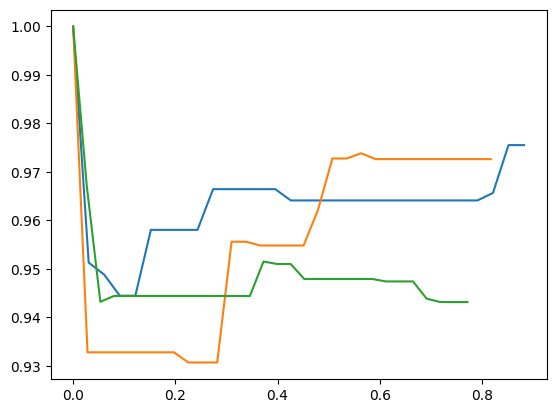

In [2]:
# zhangjun simulation data
# with information of the True factors
# did NOT limit the size of chosen set , i.e., nonzero but not knum
# Gamma chosen by all Znorm
from helpers import *
import random
from joblib import Parallel,delayed
warnings.filterwarnings('ignore')
knum = 5
svd_C_list = np.linspace(0, 0.5, 30)
SSR = 999
Hand_chosen_set=[]

for i in range(3): 
    
    Handssr=[]
    df = pd.read_csv('/home/guonaixin/trylab/sim2emp/simu_matrix/20Xfull'+str(i+1)+'.csv')
    df =df.drop('Unnamed: 0',axis=1)
    Z = np.array(df,dtype = 'float64')
    Znorm = normalize_columns(Z)
    U, S, V = np.linalg.svd(Znorm, full_matrices=False)
    U = U[:, :knum]
    Zk, Theta_tru, svd_C_hand = compute_k_truncated_svd(Znorm, knum) 
    for j in svd_C_list: 
        
        hand_svd_C= svd_C_hand*j
        
        Gammavalue = svd_convex_optimization(Znorm, hand_svd_C, knum)[1]
        nonzero = np.count_nonzero(np.round(cp.norm(Gammavalue, 2, axis=1).value,4))
        hand_chosen_set,hand_ssr= chosen_set_with_press(Gammavalue,nonzero,Znorm)
        print(hand_chosen_set)
        Handssr.append(hand_ssr)
        if hand_ssr<SSR:
            SSR = hand_ssr
            final_chosen_set =  hand_chosen_set
            
    Hand_chosen_set.append(final_chosen_set)
    plt.plot(svd_C_list*svd_C_hand ,Handssr)
print(Hand_chosen_set)

[3, 2, 1, 4, 21]
[1, 2, 4, 14, 3]
[2, 4, 1, 3, 24]


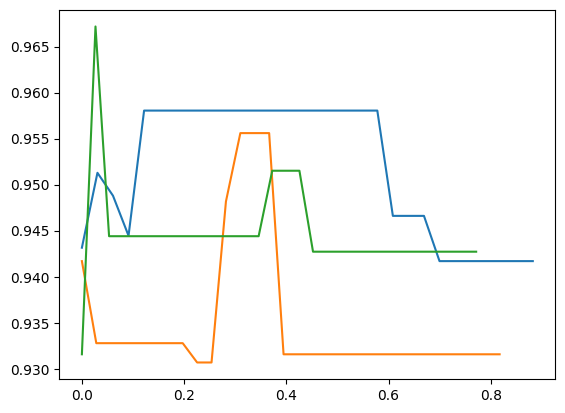

In [ ]:
# zhangjun simulation data
# with information of the True factors
# limit the size of chosen set , i.e.,knum but not nonzero 
# Gamma chosen by all Znorm
from helpers import *
import random
from joblib import Parallel,delayed
warnings.filterwarnings('ignore')
knum = 5
svd_C_list = np.linspace(0, 0.5, 30)
SSR = 999
Hand_chosen_set=[]
for i in range(3):
    Handssr=[]
    df = pd.read_csv('/home/guonaixin/trylab/sim2emp/simu_matrix/20Xfull'+str(i+1)+'.csv')
    df =df.drop('Unnamed: 0',axis=1)
    Z = np.array(df,dtype = 'float64')
    Znorm = normalize_columns(Z)
    U, S, V = np.linalg.svd(Znorm, full_matrices=False)
    U = U[:, :knum]
    Zk, Theta_tru, svd_C_hand = compute_k_truncated_svd(Znorm, knum) 
    for j in svd_C_list: 
        
        hand_svd_C= svd_C_hand*j
        
        Gammavalue = svd_convex_optimization(Znorm, hand_svd_C, knum)[1]
        nonzero = np.count_nonzero(np.round(cp.norm(Gammavalue, 2, axis=1).value,5))
        if nonzero == 0:
            pass
        elif nonzero < knum:
            hand_chosen_set,hand_ssr= chosen_set_with_press(Gammavalue,nonzero,Znorm)
        elif nonzero >= knum:    
            hand_chosen_set,hand_ssr= chosen_set_with_press(Gammavalue,knum,Znorm)
        print(hand_chosen_set)
        if hand_ssr<SSR:
            SSR = hand_ssr
            final_chosen_set =  hand_chosen_set
        Handssr.append(hand_ssr)
    Hand_chosen_set.append(final_chosen_set)
    plt.plot(svd_C_list*svd_C_hand ,Handssr)
print(Hand_chosen_set)

[0, 22, 21, 20, 19]
[3, 4, 0, 1, 2]
[3, 4, 0, 1, 2]
[3, 4, 0, 1, 2]
[3, 4, 0, 1, 2]
[3, 4, 0, 1, 2]
[3, 4, 0, 1, 2]
[3, 4, 0, 1, 2]
[3, 4, 0, 1, 2]
[3, 4, 0, 1, 2]
[3, 4, 0, 1, 2]
[3, 4, 1, 0, 2]
[3, 4, 1, 0, 2]
[3, 4, 1, 0, 2]
[3, 1, 4, 0, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[3, 1, 0, 4, 2]
[0, 22, 21, 20, 19]
[4, 1, 2, 3, 0]
[4, 1, 2, 3, 0]
[4, 1, 2, 3, 0]
[4, 1, 2, 3, 0]
[4, 1, 2, 3, 0]
[4, 1, 2, 3, 0]
[4, 1, 2, 3, 0]
[4, 1, 2, 3, 0]
[4, 1, 2, 3, 0]
[4, 1, 2, 3, 0]
[4, 1, 3, 2, 0]
[4, 1, 3, 2, 0]
[4, 1, 3, 2, 0]
[1, 4, 3, 2, 0]
[1, 4, 3, 0, 2]
[1, 4, 3, 0, 2]
[1, 4, 3, 0, 2]
[1, 3, 4, 0, 2]
[1, 3, 0, 4, 2]
[1, 3, 0, 4, 2]
[1, 3, 0, 4, 2]
[1, 3, 0, 4, 2]
[1, 3, 0, 4, 2]
[1, 3, 0, 4, 2]
[1, 3, 0, 4, 2]
[1, 3, 0, 4, 2]
[1, 3, 0, 4, 2]
[1, 3, 0, 4, 2]
[1, 3, 0, 4, 2]
[0, 22, 21, 20, 19]
[3, 4, 1, 0,

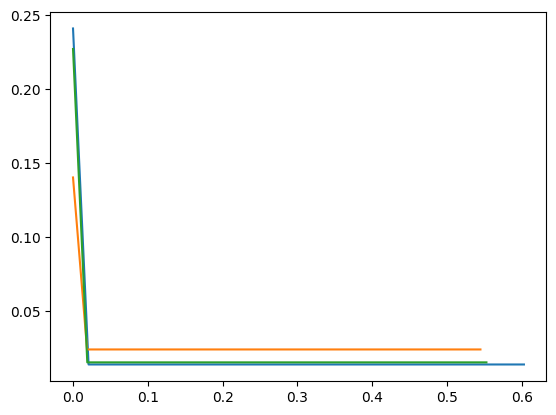

In [7]:
# low noise simulation data
# with information of the True factors
# limit the size of chosen set , i.e.,knum but not nonzero 
# Gamma chosen by all Znorm
from helpers import *
import random
from joblib import Parallel,delayed
warnings.filterwarnings('ignore')
knum = 5
svd_C_list = np.linspace(0, 0.5, 30)
for i in range(3):
    Handssr=[]
    Z, M, B = create_factors(600, 5, 25+1, sig=0.1)
    # redefine Z to be all the other columns except the last one
    Z = Z[:, :-1]
    Znorm = normalize_columns(Z)
    U, S, V = np.linalg.svd(Znorm, full_matrices=False)
    U = U[:, :knum]
    Zk, Theta_tru, svd_C_hand = compute_k_truncated_svd(Znorm, knum) 
    for j in svd_C_list: 
        
        hand_svd_C= svd_C_hand*j
        
        Gammavalue = svd_convex_optimization(Znorm, hand_svd_C, knum)[1]
        nonzero = np.count_nonzero(np.round(cp.norm(Gammavalue, 2, axis=1).value,4))
        hand_chosen_set,hand_ssr= chosen_set_with_press(Gammavalue,knum,Znorm)
        print(hand_chosen_set)
        Handssr.append(hand_ssr)
    plt.plot(svd_C_list*svd_C_hand ,Handssr)

[]
[2, 1, 4]
[2, 1, 4]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[2, 1, 4, 3, 0]
[]
[4, 2, 0, 1]
[4, 2, 0, 1]
[4, 2, 0, 1]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[4, 2, 0, 1, 3]
[]
[3, 1, 2, 4]
[3, 1, 2, 4]
[3, 1, 2, 4, 0]
[3, 1, 2, 4, 0]
[3, 1, 2, 4, 0]
[3, 1, 2, 

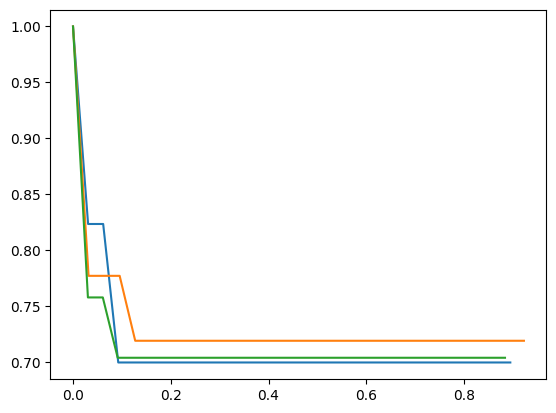

In [10]:
# low noise simulation data
# with information of the True factors
# did NOT limit the size of chosen set , i.e., nonzero but not knum
# Gamma chosen by all Znorm
from helpers import *
import random
from joblib import Parallel,delayed
warnings.filterwarnings('ignore')
knum = 5
svd_C_list = np.linspace(0, 0.5, 30)
for i in range(3):
    Handssr=[]
    Z, M, B = create_factors(600, 5, 25+1, sig=0.8)
    # redefine Z to be all the other columns except the last one
    Z = Z[:, :-1]
    Znorm = normalize_columns(Z)
    U, S, V = np.linalg.svd(Znorm, full_matrices=False)
    U = U[:, :knum]
    Zk, Theta_tru, svd_C_hand = compute_k_truncated_svd(Znorm, knum) 
    for j in svd_C_list: 
        
        hand_svd_C= svd_C_hand*j
        
        Gammavalue = svd_convex_optimization(Znorm, hand_svd_C, knum)[1]
        nonzero = np.count_nonzero(np.round(cp.norm(Gammavalue, 2, axis=1).value,4))
        hand_chosen_set,hand_ssr= chosen_set_with_press(Gammavalue,nonzero,Znorm)
        print(hand_chosen_set)
        Handssr.append(hand_ssr)
    plt.plot(svd_C_list*svd_C_hand ,Handssr)

[3, 1, 2, 4, 0]


[0, 1, 3, 4]
[0, 1, 3, 4]
[0, 1, 3, 4]
[0, 1, 3, 4]
[0, 1, 3, 4]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[0, 1, 3, 4, 2]
[2, 0, 3]
[2, 0, 3]
[2, 0, 3, 1]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 4, 1]
[2, 0, 3, 4, 1]
[2, 0, 3, 4, 1]
[2, 0, 3, 4, 1]
[2, 0, 3, 4, 1]
[2, 0, 3, 4, 1]
[2, 0, 3, 4, 1]
[2, 0, 3, 4, 1]
[2, 0, 3, 4, 1]
[2, 0, 3, 4, 1]
[2, 0, 3, 4, 1]
[2, 0, 3, 4, 1]
[2, 0, 3, 4, 1]
[4, 2, 3]
[4, 2, 3]
[4, 2, 3, 1]
[4, 2, 3, 1]
[4, 2, 3, 1, 0]
[4, 2, 3

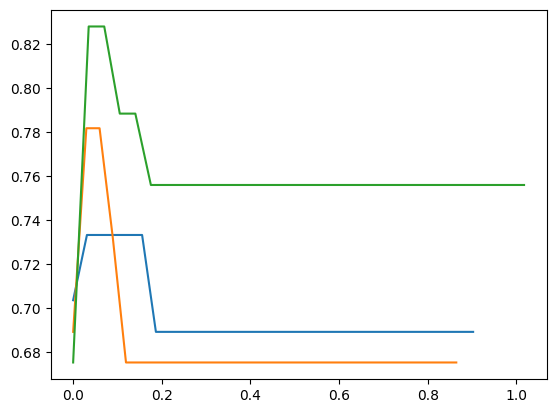

In [11]:
# low noise simulation data
# with information of the True factors
# did NOT limit the size of chosen set , i.e., nonzero but not knum
# Gamma chosen by all Znorm
from helpers import *
import random
from joblib import Parallel,delayed
warnings.filterwarnings('ignore')
knum = 5
svd_C_list = np.linspace(0, 0.5, 30)
for i in range(3):
    Handssr=[]
    Z, M, B = create_factors(600, 5, 25+1, sig=0.8)
    # redefine Z to be all the other columns except the last one
    Z = Z[:, :-1]
    Znorm = normalize_columns(Z)
    U, S, V = np.linalg.svd(Znorm, full_matrices=False)
    U = U[:, :knum]
    Zk, Theta_tru, svd_C_hand = compute_k_truncated_svd(Znorm, knum) 
    for j in svd_C_list: 
        
        hand_svd_C= svd_C_hand*j
        
        Gammavalue = svd_convex_optimization(Znorm, hand_svd_C, knum)[1]
        nonzero = np.count_nonzero(np.round(cp.norm(Gammavalue, 2, axis=1).value,5))
        if nonzero == 0:
            pass
        elif nonzero < knum:
            hand_chosen_set,hand_ssr= chosen_set_with_press(Gammavalue,nonzero,Znorm)
        elif nonzero >= knum:    
            hand_chosen_set,hand_ssr= chosen_set_with_press(Gammavalue,knum,Znorm)
        print(hand_chosen_set)
        Handssr.append(hand_ssr)
    plt.plot(svd_C_list*svd_C_hand ,Handssr)

In [12]:
hand_chosen_set

[4, 2, 3, 1, 0]